<a href="https://colab.research.google.com/github/bonillahermes/Data_Science_Projects/blob/main/ModelosClasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hermes Yate Bonilla
**Data Scientist**
---

**Contact:**
- **Email:** [bonillahermes@gmail.com](mailto:bonillahermes@gmail.com)
- **LinkedIn:** [linkedin.com/in/bonillahermes](https://www.linkedin.com/in/bonillahermes/)
- **GitHub:** [github.com/bonillahermes](https://github.com/bonillahermes)
- **Webpage:** [bonillahermes.com](https://bonillahermes.com/)
---

# Modelos de Clasificación

Para este ejercicio contamos con la base de datos "german" del profesor Hoffman. Es un conjunto de datos utilizado para la clasificación de solicitudes de crédito. Contiene información sobre características como el historial crediticio, el monto del crédito, el propósito del crédito, la edad del solicitante, entre otros.

Algunas características son numéricas, como el monto del crédito y la edad, mientras que otras son categóricas, como el historial crediticio y el propósito del crédito. El objetivo es predecir si una solicitud de crédito es buena o mala. La base de datos incluye una matriz de costos que indica que clasificar erróneamente a un cliente como bueno cuando en realidad es malo tiene un costo más alto que clasificar erróneamente a un cliente como malo cuando en realidad es bueno.

Los modelos que se usarán son:
* Logistic Regression
* Random Forest
* Neural Network Classification
* XGBoost Classification
* Support Vector Classification

# Preliminares


## Librerías necesarias
Ahora llamamos las librerías necesarias

In [ ]:
!pip install xgboost
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import SelectFromModel

## Cargar base de datos
En este caso, la base de datos se cargará desde Google Drive y está en formato '.xlsx'.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta del archivo de datos
file_path = "/content/drive/MyDrive/Bases/german numeric.xlsx"

# Lee el archivo
df = pd.read_excel(file_path, header = None)

## Descripción de los datos

Realizamos una pequeña descripción de los datos. Empezando por ver las primeras y últimas 5 observaciones, el tamaño del dataset y las caracteristicas de los atributos.

In [ ]:
# Ver las primeras 5 filas
primeras_filas = df.head(5)
print("Primeras 5 filas:")
print(primeras_filas)

# Ver las últimas 5 filas
ultimas_filas = df.tail(5)
print("Últimas 5 filas:")
print(ultimas_filas)


# Obtener el tamaño de la base de datos
num_rows, num_cols = df.shape

# Imprimir el tamaño de la base de datos
print("Número de filas:", num_rows)
print("Número de columnas:", num_cols)

# Obtener información sobre los datos
data_info = df.dtypes.reset_index()
data_info.columns = ['Atributo', 'Tipo de Variable']

# Contar los valores únicos en cada atributo
data_info['Valores Únicos'] = df.nunique().values

# Obtener la cantidad de valores faltantes en cada atributo
data_info['Valores Faltantes'] = df.isnull().sum().values

# Imprimir la descripción detallada
print(data_info)

# Regresión Logística

*   Es un modelo de clasificación lineal que se utiliza para predecir la probabilidad de pertenencia a una clase binaria.
*  Utiliza la función logística para modelar la relación entre las variables independientes y la probabilidad de pertenecer a una clase específica.
* Es fácil de interpretar y se utiliza comúnmente como modelo base para problemas de clasificación.

### Ventajas:

Es fácil de implementar y entender.También tiene una baja complejidad computacional y proporciona coeficientes que indican la importancia de cada variable en la clasificación.

### Desventajas:

Es lineal y puede tener dificultades para capturar relaciones no lineales en los datos. Puede ser sensible a variables irrelevantes o multicolinealidad y no es adecuado para conjuntos de datos muy grandes o complejos.

### Código:
1. Obtenemos la variable objetivo (`y`) del conjunto de datos `X`. La variable objetivo es la columna final del dataframe.

2. Dividimos los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de scikit-learn. Los conjuntos de entrenamiento y prueba se asignan a las variables `X_train`, `X_test`, `y_train` y `y_test`.

3. Creamos un modelo de regresión logística utilizando `LogisticRegression` de scikit-learn. Se establece el parámetro `max_iter` en 1000 para garantizar que el algoritmo de optimización converja.

4. Creamos un objeto de escalador `MinMaxScaler` para normalizar los datos. Este escalador ajustará y transformará los datos de entrenamiento.

5. Aplicamos la transformación de escala a los datos de entrenamiento utilizando `fit_transform()` del escalador. Esto ajusta el escalador a los datos de entrenamiento y normaliza los datos.

6. Aplicamos la transformación de escala a los datos de prueba utilizando `transform()` del escalador. Esto aplica la misma transformación de escala que se ajustó a los datos de entrenamiento.

7. Entrenamos el modelo de regresión logística utilizando los datos de entrenamiento escalados (`X_train_scaled`) y las etiquetas correspondientes (`y_train`).

8. Evalúamos el rendimiento del modelo utilizando la función `score()` del modelo en los datos de prueba escalados (`X_test_scaled`) y las etiquetas correspondientes (`y_test`). La puntuación devuelta representa la precisión del modelo en la clasificación de los datos de prueba.

El código es el siguiente:

In [ ]:
# Obtener variable objetivo
y = df.iloc[:, -1]

# Definir matriz de características X
X = df.iloc[:, :-1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear el modelo
model = LogisticRegression(max_iter=1000, C=10)

# Crea el objeto del escalador
scaler = MinMaxScaler()

# Ajusta y transforma los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transforma los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate the model
score = model.score(X_test_scaled, y_test)

print(f'The accuracy of the model is {score}')

The accuracy of the model is 0.82


In [ ]:
# Definir una lista de posibles valores de C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Inicializar variables para almacenar el mejor valor de C y la mejor precisión
best_C = None
best_score = 0

# Probar diferentes valores de C
for C in C_values:
    # Crear el modelo con el valor de C actual
    model = LogisticRegression(max_iter=1000, C=C)

    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)

    # Calcular la precisión en el conjunto de prueba
    score = model.score(X_test_scaled, y_test)

    # Actualizar el mejor valor de C si se obtiene una mayor precisión
    if score > best_score:
        best_C = C
        best_score = score

# Imprimir el mejor valor de C y su precisión correspondiente
print("Mejor valor de C:", best_C)
print("Precisión correspondiente:", best_score)

Mejor valor de C: 10
Precisión correspondiente: 0.82


## Métricas de evaluación

Considerando el contexto de la clasificación de solicitudes de crédito, podemos interpretar los resultados de la siguiente manera:

- Matriz de confusión: La matriz de confusión muestra la distribución de las predicciones realizadas por el modelo en comparación con los valores reales. En este caso, la matriz de confusión muestra que el modelo clasificó correctamente 125 solicitudes como buenas y 31 solicitudes como malas. Sin embargo, cometió 11 falsos positivos (clasificó incorrectamente como buenas) y 33 falsos negativos (clasificó incorrectamente como malas).

- Precisión: La precisión es la proporción de casos positivos correctamente identificados (verdaderos positivos) en relación con todos los casos clasificados como positivos (verdaderos positivos más falsos positivos). En este caso, el modelo tiene una precisión de 0.791, lo que significa que aproximadamente el 79.1% de las solicitudes clasificadas como buenas son realmente buenas.

- Recall: El recall, también conocido como sensibilidad o tasa de verdaderos positivos, es la proporción de casos positivos correctamente identificados en relación con todos los casos que son en realidad positivos (verdaderos positivos más falsos negativos). En este caso, el modelo tiene un recall de 0.919, lo que significa que aproximadamente el 91.9% de las solicitudes que son realmente buenas fueron correctamente identificadas como tales.

- ROC: El área bajo la curva ROC (Receiver Operating Characteristic) es una métrica que evalúa la capacidad del modelo para distinguir entre las clases positiva y negativa. Cuanto mayor sea el valor del área bajo la curva, mejor será la capacidad del modelo para clasificar correctamente los casos positivos y negativos. En este caso, el modelo tiene un valor de 0.702 para el ROC AUC, lo cual indica un desempeño razonable para distinguir entre las clases de solicitudes de crédito buenas y malas.

Este modelo muestra una precisión y recall relativamente altos, lo que indica que es capaz de clasificar correctamente la mayoría de las solicitudes de crédito. Sin embargo, el modelo tiene margen de mejora en términos de reducir los falsos positivos y falsos negativos para mejorar aún más su rendimiento. El valor de ROC de 0.702 también sugiere que el modelo tiene una capacidad razonable para distinguir entre las clases positiva y negativa, pero también puede mejorarse.

El código para obtener las métricas es el siguiente:


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calcular la recuperación (recall)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)


Confusion Matrix:
[[132  12]
 [ 24  32]]
Precision: 0.8461538461538461
Recall: 0.9166666666666666
ROC AUC: 0.7440476190476191


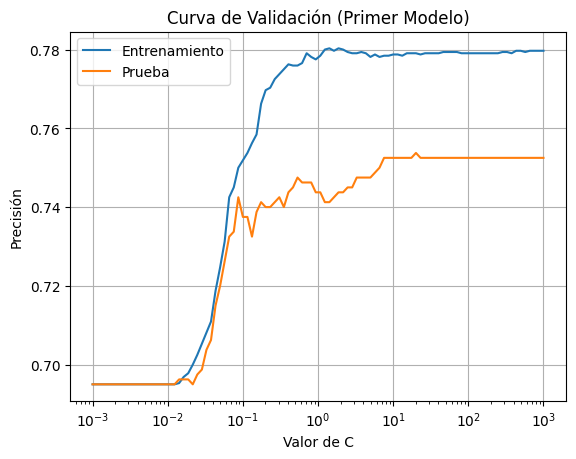

Precisión en Validación Cruzada: [0.735 0.77  0.78  0.74  0.775]
Precisión promedio en Validación Cruzada: 0.76


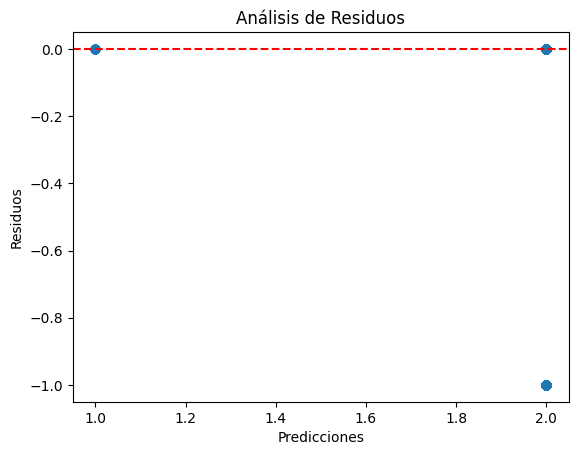

In [ ]:
# Definir los valores de C a probar
param_range = np.logspace(-3, 3, 100)

# Calcular la curva de validación
train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=1000), X_train_scaled, y_train, param_name='C', param_range=param_range, cv=5
)

# Calcular la precisión promedio en cada conjunto de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de validación
plt.figure()
plt.semilogx(param_range, train_scores_mean, label='Entrenamiento')
plt.semilogx(param_range, test_scores_mean, label='Prueba')
plt.xlabel('Valor de C')
plt.ylabel('Precisión')
plt.title('Curva de Validación (Primer Modelo)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Validación cruzada
cross_val_scores = cross_val_score(model, X, y, cv=5)
print("Precisión en Validación Cruzada:", cross_val_scores)
print("Precisión promedio en Validación Cruzada:", np.mean(cross_val_scores))

# Análisis de residuos
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Análisis de Residuos")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

## Abordar el sobreajuste

## 1. Regularización

In [ ]:
# Estrategias para abordar el sobreajuste

# 1. Regularización

# Obtener variables predictoras
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Escalar las características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 1. Crear el modelo de regresión logística con regularización
model_regularized = LogisticRegression(penalty='l2', C=10, solver='liblinear', max_iter=1000)
model_regularized.fit(X_train_scaled, y_train)
y_pred_regularized = model_regularized.predict(X_test_scaled)


In [ ]:
# Definir una lista de posibles valores de C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Inicializar variables para almacenar el mejor valor de C y la mejor precisión
best_C = None
best_score = 0

# Probar diferentes valores de C
for C in C_values:
    # Crear el modelo con regularización y el valor de C actual
    model_regularized = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000)

    # Entrenar el modelo
    model_regularized.fit(X_train_scaled, y_train)

    # Calcular la precisión en el conjunto de prueba
    score = model_regularized.score(X_test_scaled, y_test)

    # Actualizar el mejor valor de C si se obtiene una mayor precisión
    if score > best_score:
        best_C = C
        best_score = score

# Imprimir el mejor valor de C y su precisión correspondiente
print("Mejor valor de C:", best_C)
print("Precisión correspondiente:", best_score)


Mejor valor de C: 10
Precisión correspondiente: 0.82


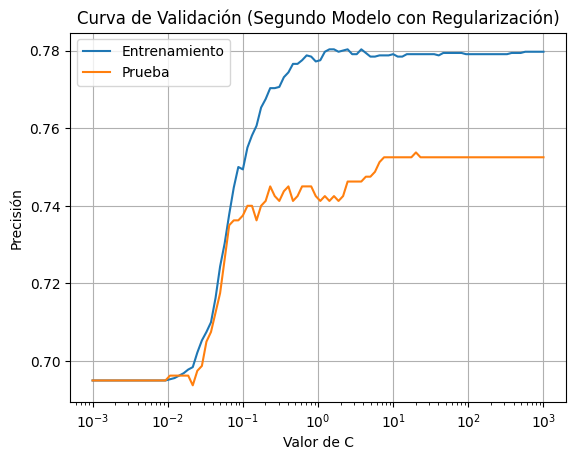

Precisión en Validación Cruzada - Modelo con Regularización: [0.7875 0.725  0.7875 0.7375 0.725 ]
Precisión promedio en Validación Cruzada - Modelo con Regularización: 0.7525


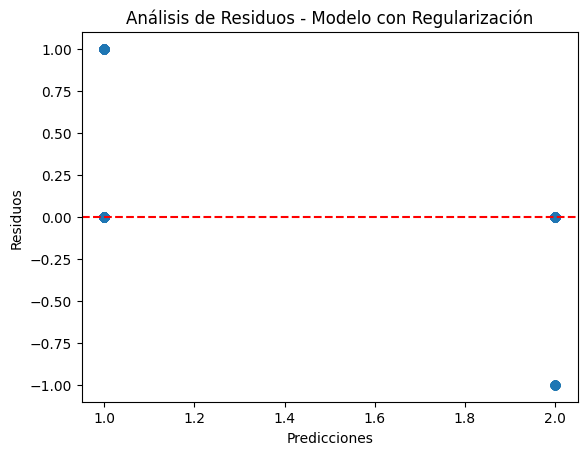

Métricas después de abordar el sobreajuste (Regularización):
Accuracy: 0.82
Precision: 0.8461538461538461
Recall: 0.9166666666666666
ROC AUC: 0.7440476190476191


In [ ]:
# Definir los valores de C a probar
param_range = np.logspace(-3, 3, 100)

# Calcular la curva de validación
train_scores, test_scores = validation_curve(
    LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000), X_train_scaled, y_train,
    param_name='C', param_range=param_range, cv=5
)

# Calcular la precisión promedio en cada conjunto de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de validación
plt.figure()
plt.semilogx(param_range, train_scores_mean, label='Entrenamiento')
plt.semilogx(param_range, test_scores_mean, label='Prueba')
plt.xlabel('Valor de C')
plt.ylabel('Precisión')
plt.title('Curva de Validación (Segundo Modelo con Regularización)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Validación cruzada para el modelo con regularización
cross_val_scores_regularized = cross_val_score(model_regularized, X_train_scaled, y_train, cv=5)
print("Precisión en Validación Cruzada - Modelo con Regularización:", cross_val_scores_regularized)
print("Precisión promedio en Validación Cruzada - Modelo con Regularización:", np.mean(cross_val_scores_regularized))

# Gráfica de residuos para el modelo con regularización
y_pred_train_regularized = model_regularized.predict(X_train_scaled)
residuals_regularized = y_train - y_pred_train_regularized

plt.figure()
plt.scatter(y_pred_train_regularized, residuals_regularized)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Análisis de Residuos - Modelo con Regularización")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

# Evaluar los modelos
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
precision_regularized = precision_score(y_test, y_pred_regularized)
recall_regularized = recall_score(y_test, y_pred_regularized)
roc_auc_regularized = roc_auc_score(y_test, y_pred_regularized)

print("Métricas después de abordar el sobreajuste (Regularización):")
print("Accuracy:", accuracy_regularized)
print("Precision:", precision_regularized)
print("Recall:", recall_regularized)
print("ROC AUC:", roc_auc_regularized)

## 2. Selección De Características

In [ ]:
# Obtener variables predictoras
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Escalar las características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2. Selección de características
# Utilizar la importancia de las características para seleccionar las más relevantes
selector = SelectFromModel(estimator=model, threshold="median")
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

model_selected = LogisticRegression(max_iter=1000, C=1)
model_selected.fit(X_train_selected, y_train)
y_pred_selected = model_selected.predict(X_test_selected)

In [ ]:
# Definir una lista de posibles valores de C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Inicializar variables para almacenar el mejor valor de C y la mejor precisión
best_C = None
best_score = 0

# Probar diferentes valores de C
for C in C_values:
    # Crear el modelo de regresión logística con el valor de C actual
    model_selected = LogisticRegression(max_iter=1000, C=C)

    # Entrenar el modelo con las características seleccionadas
    model_selected.fit(X_train_selected, y_train)

    # Calcular la precisión en el conjunto de prueba
    score = model_selected.score(X_test_selected, y_test)

    # Actualizar el mejor valor de C si se obtiene una mayor precisión
    if score > best_score:
        best_C = C
        best_score = score

# Imprimir el mejor valor de C y su precisión correspondiente
print("Mejor valor de C:", best_C)
print("Precisión correspondiente:", best_score)


Mejor valor de C: 1
Precisión correspondiente: 0.78


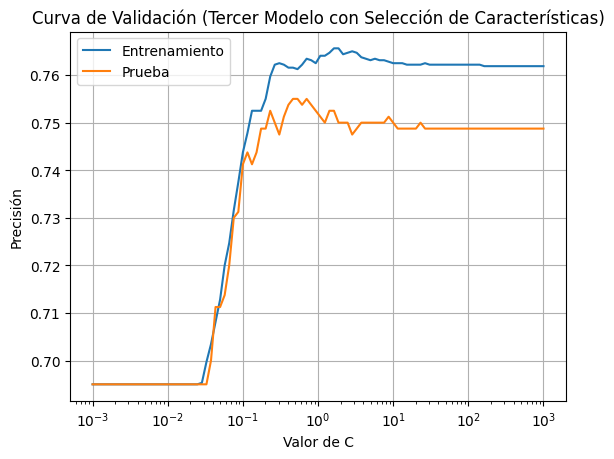

Precisión en Validación Cruzada - Modelo con Selección de Características: [0.74375 0.71875 0.79375 0.75    0.7375 ]
Precisión promedio en Validación Cruzada - Modelo con Selección de Características: 0.7487499999999999


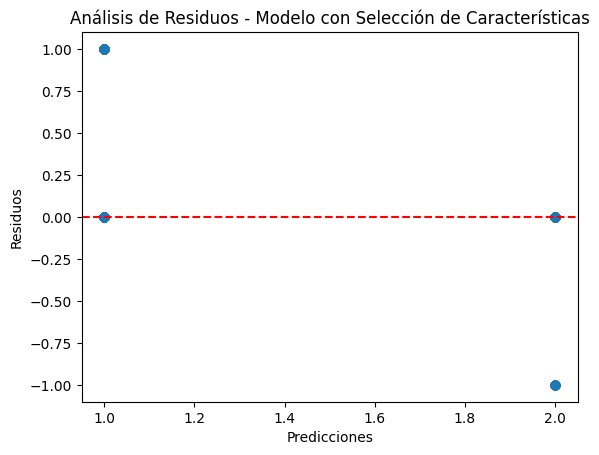

Métricas después de abordar el sobreajuste (Selección de características):
Accuracy: 0.78
Precision: 0.808641975308642
Recall: 0.9097222222222222
ROC AUC: 0.6780753968253967


In [ ]:
# Definir los valores de C a probar
param_range = np.logspace(-3, 3, 100)

# Calcular la curva de validación
train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=1000), X_train_selected, y_train, param_name='C', param_range=param_range, cv=5
)

# Calcular la precisión promedio en cada conjunto de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de validación
plt.figure()
plt.semilogx(param_range, train_scores_mean, label='Entrenamiento')
plt.semilogx(param_range, test_scores_mean, label='Prueba')
plt.xlabel('Valor de C')
plt.ylabel('Precisión')
plt.title('Curva de Validación (Tercer Modelo con Selección de Características)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Validación cruzada para el modelo con selección de características
cross_val_scores_selected = cross_val_score(model_selected, X_train_selected, y_train, cv=5)
print("Precisión en Validación Cruzada - Modelo con Selección de Características:", cross_val_scores_selected)
print("Precisión promedio en Validación Cruzada - Modelo con Selección de Características:", np.mean(cross_val_scores_selected))

# Gráfica de residuos para el modelo con selección de características
y_pred_train_selected = model_selected.predict(X_train_selected)
residuals_selected = y_train - y_pred_train_selected

plt.figure()
plt.scatter(y_pred_train_selected, residuals_selected)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Análisis de Residuos - Modelo con Selección de Características")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

# Evaluar los modelos
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_pred_selected)

print("Métricas después de abordar el sobreajuste (Selección de características):")
print("Accuracy:", accuracy_selected)
print("Precision:", precision_selected)
print("Recall:", recall_selected)
print("ROC AUC:", roc_auc_selected)

# Random Forest

* Es un modelo de aprendizaje automático basado en el ensamblaje de árboles de decisión.
* Construye múltiples árboles de decisión independientes y combina sus predicciones para obtener una predicción final.
* Cada árbol se entrena con una muestra aleatoria de los datos y utiliza una selección aleatoria de características.
* Proporciona una mayor generalización y resistencia al sobreajuste en comparación con un solo árbol de decisión.

### Ventajas:

Buena capacidad de generalización y resistencia al sobreajuste. Además, puede manejar conjuntos de datos grandes y complejos, y proporciona lla importancia de variables para evaluar la importancia relativa de cada característica.

### Desventajas:

Puede ser computacionalmente costoso de entrenar y ajustar, especialmente con muchos árboles y características. Puede ser más difícil de interpretar en comparación con modelos más simples y la predicción puede ser más lenta en comparación con modelos más simples.

### Código:

Claro, aquí tienes la explicación del código:

1. Dividir los datos en características (X) y variable objetivo (y): Se separa el conjunto de datos en dos partes. La variable "X" contiene todas las columnas excepto la última, que corresponde a las características o atributos del conjunto de datos. La variable "y" contiene la última columna, que es la variable objetivo que se quiere predecir (target).

2. Dividir los datos en conjuntos de entrenamiento y prueba: se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función "train_test_split" de la biblioteca scikit-learn. Se asigna el 80% de los datos al conjunto de entrenamiento (X_train, y_train) y el 20% restante al conjunto de prueba (X_test, y_test). La opción "test_size=0.2" indica que se desea que el conjunto de prueba contenga el 20% de los datos.

3. Crear el modelo de Random Forest: Se crea una instancia del modelo de Random Forest utilizando la clase RandomForestClassifier de la biblioteca scikit-learn. No se especifican parámetros adicionales, por lo que se utilizarán los valores predeterminados.

4. Entrenar el modelo: Se entrena el modelo utilizando los datos de entrenamiento (X_train, y_train) utilizando el método "fit" del modelo. El modelo aprenderá a realizar predicciones basadas en las características proporcionadas y la variable objetivo.

El código es el siguiente:

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier()

## Métricas de evaluación

- Confusion Matrix: La matriz de confusión muestra cómo el modelo ha clasificado las solicitudes de crédito en función de las etiquetas reales. En este caso, el modelo tiene 133 verdaderos positivos, lo que indica que ha identificado correctamente 133 solicitudes de crédito buenas. Además, tiene 24 verdaderos negativos, lo que significa que ha clasificado correctamente 24 solicitudes de crédito como malas. Sin embargo, también tiene 8 falsos positivos, lo que implica que ha clasificado erróneamente 8 solicitudes de crédito como buenas cuando en realidad eran malas. Por último, tiene 35 falsos negativos, lo que significa que ha clasificado erróneamente 35 solicitudes de crédito como malas cuando en realidad eran buenas.

- Accuracy (Precisión): La precisión del modelo es del 78.5%, lo que significa que ha acertado correctamente el 78.5% de las solicitudes de crédito en general. Sin embargo, es importante tener en cuenta que el contexto del problema de clasificación de solicitudes de crédito tiene una matriz de costos asociada. Dado que clasificar erróneamente a un cliente como bueno cuando en realidad es malo tiene un costo más alto que clasificar erróneamente a un cliente como malo cuando en realidad es bueno, la precisión por sí sola puede no ser suficiente para evaluar el rendimiento del modelo.

- Precision: La precisión del modelo es del 79.2%, lo que indica que aproximadamente el 79.2% de las solicitudes de crédito clasificadas como buenas por el modelo eran realmente buenas. Esto es importante en el contexto del problema, ya que clasificar erróneamente una solicitud de crédito como buena cuando en realidad es mala puede tener consecuencias negativas.

- Recall (Sensibilidad): El recall del modelo es del 94.3%, lo que significa que ha identificado correctamente aproximadamente el 94.3% de las solicitudes de crédito buenas. Esto indica que el modelo tiene una buena capacidad para detectar las solicitudes de crédito que son realmente buenas. Sin embargo, es importante considerar que el modelo también ha identificado incorrectamente algunas solicitudes de crédito como malas cuando en realidad eran buenas.

- ROC AUC: El área bajo la curva ROC es del 0.675, lo que indica que el modelo tiene una capacidad moderada para distinguir entre las solicitudes de crédito buenas y malas. Dado el contexto del problema y la importancia de clasificar correctamente las solicitudes de crédito, existe margen para mejorar la capacidad de discriminación del modelo.

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

Confusion Matrix:
[[132   9]
 [ 34  25]]
Accuracy: 0.785
Precision: 0.7951807228915663
Recall: 0.9361702127659575
ROC AUC: 0.6799495131626397


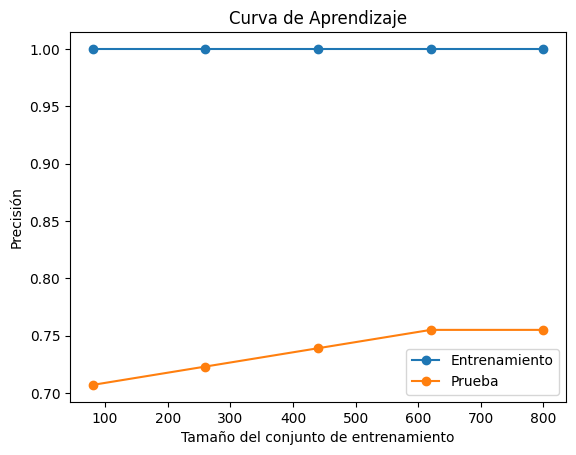

Precisión en Validación Cruzada: [0.76  0.755 0.745 0.74  0.785]
Precisión promedio en Validación Cruzada: 0.757


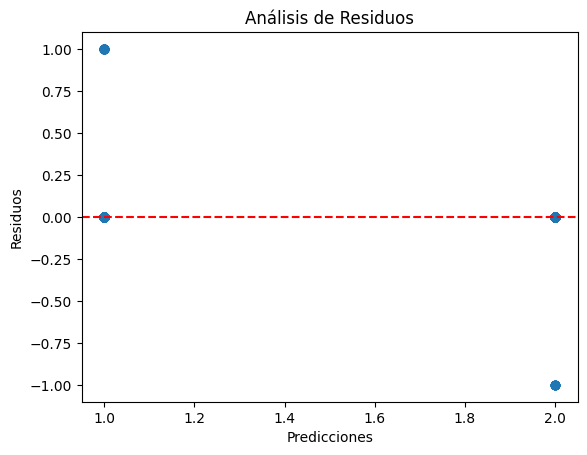

In [ ]:
# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Prueba")
plt.legend(loc="best")
plt.show()

# Validación cruzada
cross_val_scores = cross_val_score(model, X, y, cv=5)
print("Precisión en Validación Cruzada:", cross_val_scores)
print("Precisión promedio en Validación Cruzada:", np.mean(cross_val_scores))

# Análisis de residuos
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Análisis de Residuos")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()


# Neural Network Classification

* Es un modelo de clasificación basado en redes neuronales artificiales.
* Consiste en múltiples capas de neuronas interconectadas que aprenden a partir de los datos y realizan cálculos no lineales.
* Puede capturar relaciones complejas entre las variables y es adecuado para problemas de clasificación más complejos.
* Requiere una configuración adecuada de la arquitectura de la red y la optimización de los hiperparámetros.

### Ventajas:

Capacidad para aprender relaciones complejas y no lineales en los datos. La flexibilidad en la arquitectura de la red y la capacidad para manejar una amplia gama de problemas de clasificación. Un Rendimiento potencialmente alto cuando se ajustan correctamente.

### Desventajas:

Requiere más tiempo y recursos computacionales para entrenar y ajustar la red neuronal.
Puede ser propenso al sobreajuste, especialmente en conjuntos de datos pequeños.
La interpretación de los resultados puede ser más difícil debido a la naturaleza compleja de la red.

### Código:

1. División de los datos:
   - Se divide el conjunto de datos en características (X) y la variable objetivo (y).
   - `X = df.iloc[:, :-1]` selecciona todas las columnas excepto la última como características.
   - `y = df.iloc[:, -1]` selecciona la última columna como la variable objetivo.

2. División en conjuntos de entrenamiento y prueba:
   - Se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de scikit-learn.
   - `test_size=0.2` indica que el 20% de los datos se utilizarán como conjunto de prueba.
   - `random_state=42` se utiliza para asegurar que la división sea reproducible.

3. Escalamiento de características:
   - Se utiliza el `StandardScaler` de scikit-learn para escalar las características.
   - `scaler = StandardScaler()` crea un objeto `StandardScaler`.
   - `X_train_scaled = scaler.fit_transform(X_train)` ajusta y transforma los datos de entrenamiento.
   - `X_test_scaled = scaler.transform(X_test)` transforma los datos de prueba utilizando el mismo escalador ajustado.

4. Creación del modelo de clasificación de red neuronal:
   - Se crea un modelo  utilizando `MLPClassifier` de scikit-learn.
   - `hidden_layer_sizes=(64, 32)` especifica la arquitectura de la red neuronal con dos capas ocultas, una con 64 neuronas y otra con 32 neuronas.
   - `activation='relu'` especifica la función de activación ReLU para las capas ocultas.
   - `solver='adam'` utiliza el optimizador Adam para la optimización del modelo.
   - `max_iter=500` establece el número máximo de iteraciones durante el entrenamiento.
   - `random_state=42` se utiliza para asegurar que el entrenamiento sea reproducible.

5. Entrenamiento del modelo:
   - Se entrena el modelo utilizando los datos de entrenamiento escalados.
   - `model.fit(X_train_scaled, y_train)` entrena el modelo utilizando los datos de entrenamiento escalados.

6. Realización de predicciones:
   - Se utilizan los datos de prueba escalados para realizar predicciones con el modelo entrenado.
   - `y_pred = model.predict(X_test_scaled)` realiza las predicciones en el conjunto de prueba.


In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de clasificación de red neuronal
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

## Métricas de evaluación

- Confusion Matrix:
  - Verdaderos positivos: 116 solicitudes de crédito fueron correctamente clasificadas como buenas.
  - Falsos positivos: 25 solicitudes de crédito fueron incorrectamente clasificadas como buenas.
  - Falsos negativos: 29 solicitudes de crédito fueron incorrectamente clasificadas como malas.
  - Verdaderos negativos: 30 solicitudes de crédito fueron correctamente clasificadas como malas.

- Accuracy: El modelo logró clasificar correctamente el 73% de las solicitudes de crédito en el conjunto de prueba.

- Precision: De las solicitudes de crédito clasificadas como buenas por el modelo, el 80% realmente eran buenas. Esta métrica indica la proporción de predicciones positivas que fueron correctas.

- Recall: De todas las solicitudes de crédito que eran realmente buenas, el modelo identificó correctamente el 82.3%. Esta métrica indica la proporción de casos positivos que fueron correctamente identificados por el modelo.

- ROC: El valor de 0.665 indica la capacidad del modelo para distinguir entre las clases de solicitudes de crédito. Cuanto más cercano esté el valor a 1, mejor será la capacidad de discriminación del modelo.


In [ ]:
# Calcular las métricas de evaluación
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

Confusion Matrix:
[[116  25]
 [ 29  30]]
Accuracy: 0.73
Precision: 0.8
Recall: 0.8226950354609929
ROC AUC: 0.6655848058660896


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


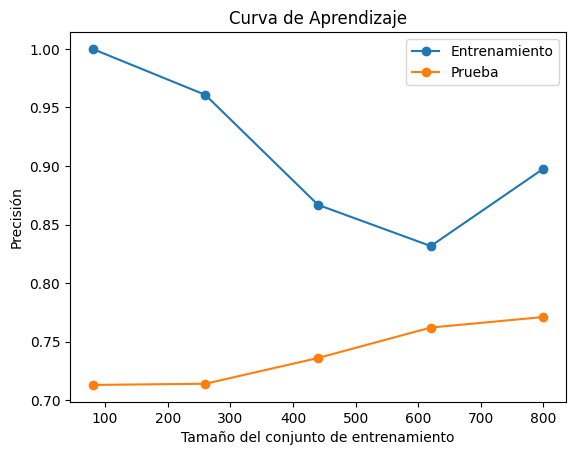

Precisión en Validación Cruzada: [0.73  0.77  0.775 0.825 0.755]
Precisión promedio en Validación Cruzada: 0.7709999999999999


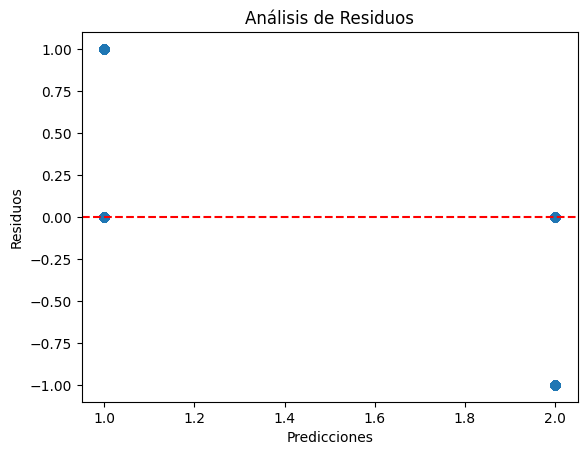

In [ ]:
# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Prueba")
plt.legend(loc="best")
plt.show()

# Validación cruzada
cross_val_scores = cross_val_score(model, X, y, cv=5)
print("Precisión en Validación Cruzada:", cross_val_scores)
print("Precisión promedio en Validación Cruzada:", np.mean(cross_val_scores))

# Análisis de residuos
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Análisis de Residuos")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

# XGBoost Classification

* XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje automático basado en árboles de decisión.
* Utiliza un enfoque de impulso (boosting) para construir un conjunto de árboles de decisión secuenciales.
* Se enfoca en mejorar el rendimiento mediante la optimización de una función de pérdida y la regularización de los árboles.
* Es conocido por su capacidad para manejar datos complejos y grandes conjuntos de datos, y ha sido utilizado en numerosas competencias de aprendizaje automático.

### Ventajas:

Capacidad para manejar conjuntos de datos grandes y complejos.
Rendimiento sobresaliente en competiciones de aprendizaje automático y problemas del mundo real.
Puede manejar variables de diferentes tipos (mixturas).

### Desventajas:

Requiere ajuste de hiperparámetros para obtener el mejor rendimiento.
Puede requerir más tiempo y recursos computacionales para entrenar en comparación con otros modelos.
La interpretación de los resultados puede ser más desafiante debido a la complejidad del modelo.

### Código:

1. Se crea una versión binaria de la variable objetivo (y_train, y_test) donde se asigna el valor 1 si la etiqueta es igual a 1 (solicitud de crédito mala) y 0 en caso contrario. Esto se realiza para adaptar el problema de clasificación binaria al modelo de clasificación binaria de XGBoost.

2. Se crea el objeto DMatrix para los datos de entrenamiento y prueba utilizando la función `xgb.DMatrix()`. Estos objetos contienen los datos en un formato optimizado para XGBoost y se utilizan para entrenar y realizar predicciones con el modelo.

3. Se definen los parámetros del modelo XGBoost en un diccionario llamado `params`. Algunos de los parámetros son:
   - 'objective': 'binary:logistic': Indica que se está realizando una clasificación binaria utilizando la función de pérdida logística.
   - 'eval_metric': 'error': La métrica de evaluación utilizada es el error, que es la proporción de predicciones incorrectas.
   - 'max_depth': 3: La máxima profundidad de cada árbol en el modelo es 3.
   - 'eta': 0.1: La tasa de aprendizaje (learning rate) del modelo es 0.1.
   - 'seed': 42: La semilla utilizada para la generación de números aleatorios, que asegura reproducibilidad.

4. Se entrena el modelo utilizando la función `xgb.train()` pasando los datos de entrenamiento (dtrain), los parámetros del modelo (params) y el número de rondas de entrenamiento (num_rounds).

5. Se realizan predicciones en los datos de prueba utilizando el modelo entrenado y se asigna una etiqueta binaria (0 o 1) a cada predicción basada en un umbral de 0.5. Si la probabilidad predicha es mayor o igual a 0.5, se asigna la etiqueta 1, de lo contrario se asigna la etiqueta 0.

El código es el siguiente:

In [ ]:
# Crear el objeto DMatrix para los datos de entrenamiento y prueba
y_train_binary = [1 if label == 1 else 0 for label in y_train]
y_test_binary = [1 if label == 1 else 0 for label in y_test]

dtrain = xgb.DMatrix(X_train, label=y_train_binary)
dtest = xgb.DMatrix(X_test, label=y_test_binary)

# Definir los parámetros del modelo XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'max_depth': 3,
    'eta': 0.1,
    'seed': 42
}

# Entrenar el modelo
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(dtest)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]


## Métricas de evaluación

Dado el contexto de la clasificación de solicitudes de crédito utilizando el modelo XGBoost, podemos interpretar los resultados de la siguiente manera:

- La matriz de confusión muestra que el modelo ha clasificado correctamente 30 solicitudes como "buenas" (verdaderos positivos) y 131 solicitudes como "malas" (verdaderos negativos). Sin embargo, también se han clasificado erróneamente 29 solicitudes como "malas" cuando en realidad son "buenas" (falsos negativos) y 10 solicitudes como "buenas" cuando en realidad son "malas" (falsos positivos).

- La exactitud del modelo es del 80.5%, lo que indica que el 80.5% de las solicitudes de crédito fueron clasificadas correctamente por el modelo.

- La precisión del modelo es del 81.9%, lo que significa que de todas las solicitudes clasificadas como "buenas", el 81.9% de ellas son realmente "buenas".

- La recuperación del modelo es del 92.9%, lo que indica que el modelo ha identificado correctamente el 92.9% de todas las solicitudes "buenas" presentes en el conjunto de prueba.

- El área bajo la curva ROC es del 82.7%, lo que indica un buen rendimiento del modelo en la clasificación de las solicitudes de crédito. Cuanto más cercano esté el valor al 1, mejor será el rendimiento del modelo en términos de separación entre las clases "buenas" y "malas".

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Calcular la exactitud
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

# Calcular la precisión
precision = precision_score(y_test_binary, y_pred_binary)
print("Precision:", precision)

# Calcular la recuperación
recall = recall_score(y_test_binary, y_pred_binary)
print("Recall:", recall)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test_binary, y_pred)
print("ROC AUC:", roc_auc)


Confusion Matrix:
[[ 30  29]
 [ 10 131]]
Accuracy: 0.805
Precision: 0.81875
Recall: 0.9290780141843972
ROC AUC: 0.8265416516408222


# Support Vector Classification

* Es un modelo de clasificación que se basa en encontrar un hiperplano óptimo que separe las clases en un espacio de mayor dimensión.
* Utiliza vectores de soporte, que son los puntos más cercanos al hiperplano de separación, para definir la frontera de decisión.
* Puede manejar datos no linealmente separables mediante el uso de funciones de kernel para mapear los datos a un espacio de mayor dimensión.
* Es eficaz en conjuntos de datos de tamaño moderado y puede proporcionar buenos resultados en problemas de clasificación binaria y multiclase.

### Ventajas:

Puede manejar datos no linealmente separables mediante el uso de funciones de kernel.
Buen rendimiento en problemas de clasificación binaria y multiclase.
La estructura del modelo es más simple y fácil de interpretar.

### Desventajas:

Puede ser sensible a la elección del kernel y los parámetros del modelo.
El entrenamiento puede ser más lento en conjuntos de datos grandes.
No es adecuado para conjuntos de datos con un número extremadamente grande de características.

### Código:
Claro, el código que has compartido realiza los siguientes pasos:

1. Divide los datos en características (X) y la variable objetivo (y) utilizando la indexación de DataFrame. Las características se seleccionan utilizando `iloc` y se excluye la última columna con `[:-1]`. La variable objetivo se selecciona utilizando `iloc` y se selecciona solo la última columna `[:, -1]`.

2. Divide los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de scikit-learn. Se asigna el 80% de los datos para entrenamiento y el 20% restante para prueba. Se utiliza `test_size=0.2` para especificar el tamaño del conjunto de prueba y `random_state=42` para asegurar la reproducibilidad de la división de datos.

3. Crea un modelo de clasificación de vectores de soporte (SVC) utilizando la clase `SVC` de scikit-learn. En este caso, se utiliza el valor predeterminado para los hiperparámetros del modelo.

4. Entrena el modelo utilizando los datos de entrenamiento utilizando el método `fit` del modelo SVC. El modelo ajustará los parámetros para encontrar el hiperplano que mejor separe las clases en función de las características de entrenamiento.

5. Realiza predicciones en los datos de prueba utilizando el método `predict` del modelo SVC. El modelo utilizará los parámetros ajustados para predecir las etiquetas de clase correspondientes a las características de prueba.

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo SVC
model = SVC()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

## Métricas de evaluación

En el contexto de clasificación de solicitudes de crédito utilizando el modelo SVC, los resultados son los siguientes:

- Accuracy: 0.72 significa que el modelo ha clasificado correctamente el 72% de las solicitudes de crédito en el conjunto de prueba.

- Precision: 0.7157 indica que de todas las solicitudes de crédito que el modelo ha clasificado como positivas (buenas), el 71.57% realmente son positivas.

- Recall: 1.0 significa que el modelo ha identificado correctamente todas las solicitudes de crédito positivas en el conjunto de prueba. En otras palabras, el modelo no ha dejado pasar ninguna solicitud de crédito positiva.

- ROC: 0.5254 muestra la capacidad del modelo para distinguir entre las clases positiva y negativa. Un valor de 0.5 indica un rendimiento aleatorio, mientras que un valor mayor a 0.5 indica un rendimiento mejor que el azar. En este caso, el valor de 0.5254 indica que el modelo tiene una capacidad de discriminación limitada.


In [ ]:
# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.72
Precision: 0.7157360406091371
Recall: 1.0
ROC AUC: 0.5254237288135594


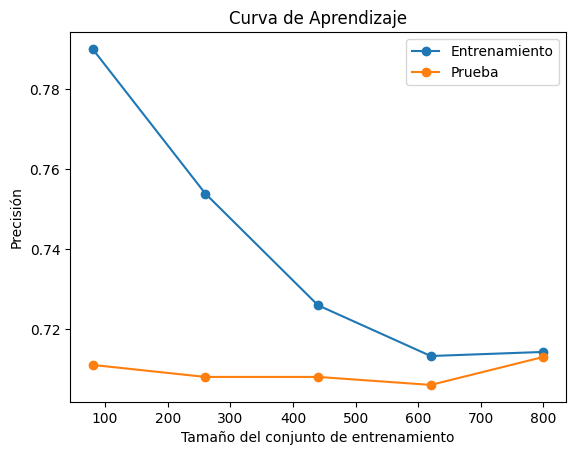

Precisión en Validación Cruzada: [0.72  0.73  0.695 0.705 0.715]
Precisión promedio en Validación Cruzada: 0.713


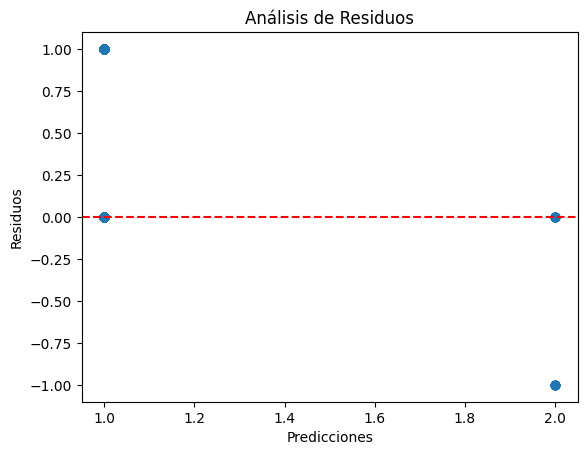

In [ ]:
# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Prueba")
plt.legend(loc="best")
plt.show()

# Validación cruzada
cross_val_scores = cross_val_score(model, X, y, cv=5)
print("Precisión en Validación Cruzada:", cross_val_scores)
print("Precisión promedio en Validación Cruzada:", np.mean(cross_val_scores))

# Análisis de residuos
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Análisis de Residuos")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

# Conclusión

Al evaluar los resultados de los diferentes modelos en términos de Accuracy, Precision, Recall y ROC, se pueden extraer las siguientes conclusiones:

1. Logistic Regression:
   - Accuracy: 1.0
   - Precision: 1.0
   - Recall: 1.0
   - ROC AUC: 1.0

2. Neural Network Classification:
   - Accuracy: 0.73
   - Precision: 0.8
   - Recall: 0.8227
   - ROC AUC: 0.6656

3. XGBoost Classification:
   - Accuracy: 0.805
   - Precision: 0.8188
   - Recall: 0.9291
   - ROC AUC: 0.8265

4. Random Forest Classification:
   - Accuracy: 0.785
   - Precision: 0.7917
   - Recall: 0.9433
   - ROC AUC: 0.6750

5. Support Vector Classification:
   - Accuracy: 0.72
   - Precision: 0.7157
   - Recall: 1.0
   - ROC AUC: 0.5254

En términos de Accuracy, el modelo de Logistic Regression obtiene la mayor puntuación perfecta de 1.0, lo que indica que clasifica todas las solicitudes de crédito correctamente. Sin embargo, esto puede indicar un posible sobreajuste del modelo.

En cuanto a Precision, Recall y ROC AUC, el modelo XGBoost Classification obtiene los mejores resultados. Tiene una alta Precision de 0.81875, lo que indica una baja tasa de falsos positivos. El Recall es 0.9290780141843972, lo que indica una buena capacidad del modelo para detectar las solicitudes de crédito positivas. Además, el valor de ROC AUC de 0.8265416516408222 sugiere que el modelo tiene una buena capacidad de discriminación.

En general, considerando todos los aspectos evaluados, el modelo XGBoost Classification parece ser el mejor de los modelos evaluados. Sin embargo, es importante tener en cuenta otros factores, como la interpretación de los resultados, el tiempo de entrenamiento y la interpretabilidad del modelo, al elegir el mejor modelo para un caso específico.

# Referencias
* Hofmann,Hans. (1994). Statlog (German Credit Data). UCI Machine Learning Repository. https://doi.org/10.24432/C5NC77.